# Crop Recommandation

In [95]:
import warnings
warnings.filterwarnings(action='ignore')

### Import Required Packages

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Working on Regional Dataset 

### Load the Regional Data

In [97]:
df1=pd.read_csv("./Dataset/Regional_Data.csv")

In [98]:
df1.head(5)

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [99]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB


### Data Cleaning

In [100]:
df1.isna().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

In [101]:
df1["Production"].fillna(df1["Production"].mean(),inplace=True)

In [102]:
df1.describe()

,Crop_Year,Area,Production
count,246091.000000,2.460910e+05,2.460910e+05
mean,2005.643018,1.200282e+04,5.825034e+05
std,4.952164,5.052340e+04,1.693599e+07
min,1997.000000,4.000000e-02,0.000000e+00
25%,2002.000000,8.000000e+01,9.100000e+01
50%,2006.000000,5.820000e+02,7.880000e+02
75%,2010.000000,4.392000e+03,8.000000e+03
max,2015.000000,8.580100e+06,1.250800e+09


In [103]:
df1["Season"].unique()

array(['Kharif     ', 'Whole Year ', 'Autumn     ', 'Rabi       ',
       'Summer     ', 'Winter     '], dtype=object)

In [104]:
df1["Season"].head(20)

0     Kharif     
1     Kharif     
2     Kharif     
3     Whole Year 
4     Whole Year 
5     Whole Year 
6     Whole Year 
7     Whole Year 
8     Whole Year 
9     Whole Year 
10    Kharif     
11    Kharif     
12    Kharif     
13    Whole Year 
14    Whole Year 
15    Whole Year 
16    Whole Year 
17    Whole Year 
18    Kharif     
19    Whole Year 
Name: Season, dtype: object

In [105]:
df1['Season']=df1['Season'].str.strip()

In [106]:
df1.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [107]:
# Here Area and Production this are not useful for crop Recommandation 
# So drop them

In [108]:
df1.drop(['Area', 'Production'], axis=1, inplace=True)

In [109]:
df1.drop('Crop_Year',axis=1,inplace=True)

In [110]:
df1.head()

,State_Name,District_Name,Season,Crop
0,Andaman and Nicobar Islands,NICOBARS,Kharif,Arecanut
1,Andaman and Nicobar Islands,NICOBARS,Kharif,Other Kharif pulses
2,Andaman and Nicobar Islands,NICOBARS,Kharif,Rice
3,Andaman and Nicobar Islands,NICOBARS,Whole Year,Banana
4,Andaman and Nicobar Islands,NICOBARS,Whole Year,Cashewnut


In [111]:
df1.isna().sum()

State_Name       0
District_Name    0
Season           0
Crop             0
dtype: int64

### Convert Categorical values into numeric

In [113]:
# Step 1: Load the dataset
regional_df = df1

# Step 2: Get user input
user_state = "Maharashtra"
user_district = "PUNE"
user_season = "Kharif"  # optional

# Step 3: Filter the dataset based on user input
filtered = regional_df[
    (regional_df["State_Name"] == user_state) &
    (regional_df["District_Name"] == user_district) &
    (regional_df["Season"] == user_season)
]

# Step 4: Extract unique crop names
crops = filtered["Crop"].unique().tolist()

# Step 5: Display output
print("Crops grown in", user_district, "district of", user_state, "during", user_season, "season are:")
print(crops)


Crops grown in PUNE district of Maharashtra during Kharif season are:
['Arhar/Tur', 'Bajra', 'Gram', 'Jowar', 'Maize', 'Moong(Green Gram)', 'Pulses total', 'Ragi', 'Rice', 'Sugarcane', 'Total foodgrain', 'Urad', 'Castor seed', 'Cotton(lint)', 'Groundnut', 'Niger seed', 'Other Cereals & Millets', 'Other Kharif pulses', 'Sesamum', 'Soyabean', 'Sunflower', 'Small millets', 'other oilseeds']


In [112]:
df1.head()

,State_Name,District_Name,Season,Crop
0,Andaman and Nicobar Islands,NICOBARS,Kharif,Arecanut
1,Andaman and Nicobar Islands,NICOBARS,Kharif,Other Kharif pulses
2,Andaman and Nicobar Islands,NICOBARS,Kharif,Rice
3,Andaman and Nicobar Islands,NICOBARS,Whole Year,Banana
4,Andaman and Nicobar Islands,NICOBARS,Whole Year,Cashewnut


# Working on Soil Data

In [135]:
df2=pd.read_csv("./Dataset/Soil_Data.csv")

In [136]:
df2.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [137]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
df2["Encoded_Labels"]=label.fit_transform(df2["label"])

In [138]:
df2.head()

,N,P,K,temperature,humidity,ph,rainfall,label,Encoded_Labels
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,20


In [139]:
df2['Encoded_Labels'].unique()

array([20, 11,  3,  9, 18, 13, 14,  2, 10, 19,  1, 12,  7, 21, 15,  0, 16,
       17,  4,  6,  8,  5])

In [140]:
df2["label"].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

In [141]:
df2.drop('label',axis=1,inplace=True)

In [142]:
df2.rename(columns={'Encoded_Labels': 'Crop'}, inplace=True)


In [143]:
df2.head()

,N,P,K,temperature,humidity,ph,rainfall,Crop
0,90,42,43,20.879744,82.002744,6.502985,202.935536,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,20


## EDA

In [144]:
df2.corr()

,N,P,K,temperature,humidity,ph,rainfall,Crop
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020,-0.031130
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839,-0.491006
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461,-0.346417
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084,0.113606
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423,0.193911
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069,-0.012253
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000,0.045611
Crop,-0.031130,-0.491006,-0.346417,0.113606,0.193911,-0.012253,0.045611,1.000000


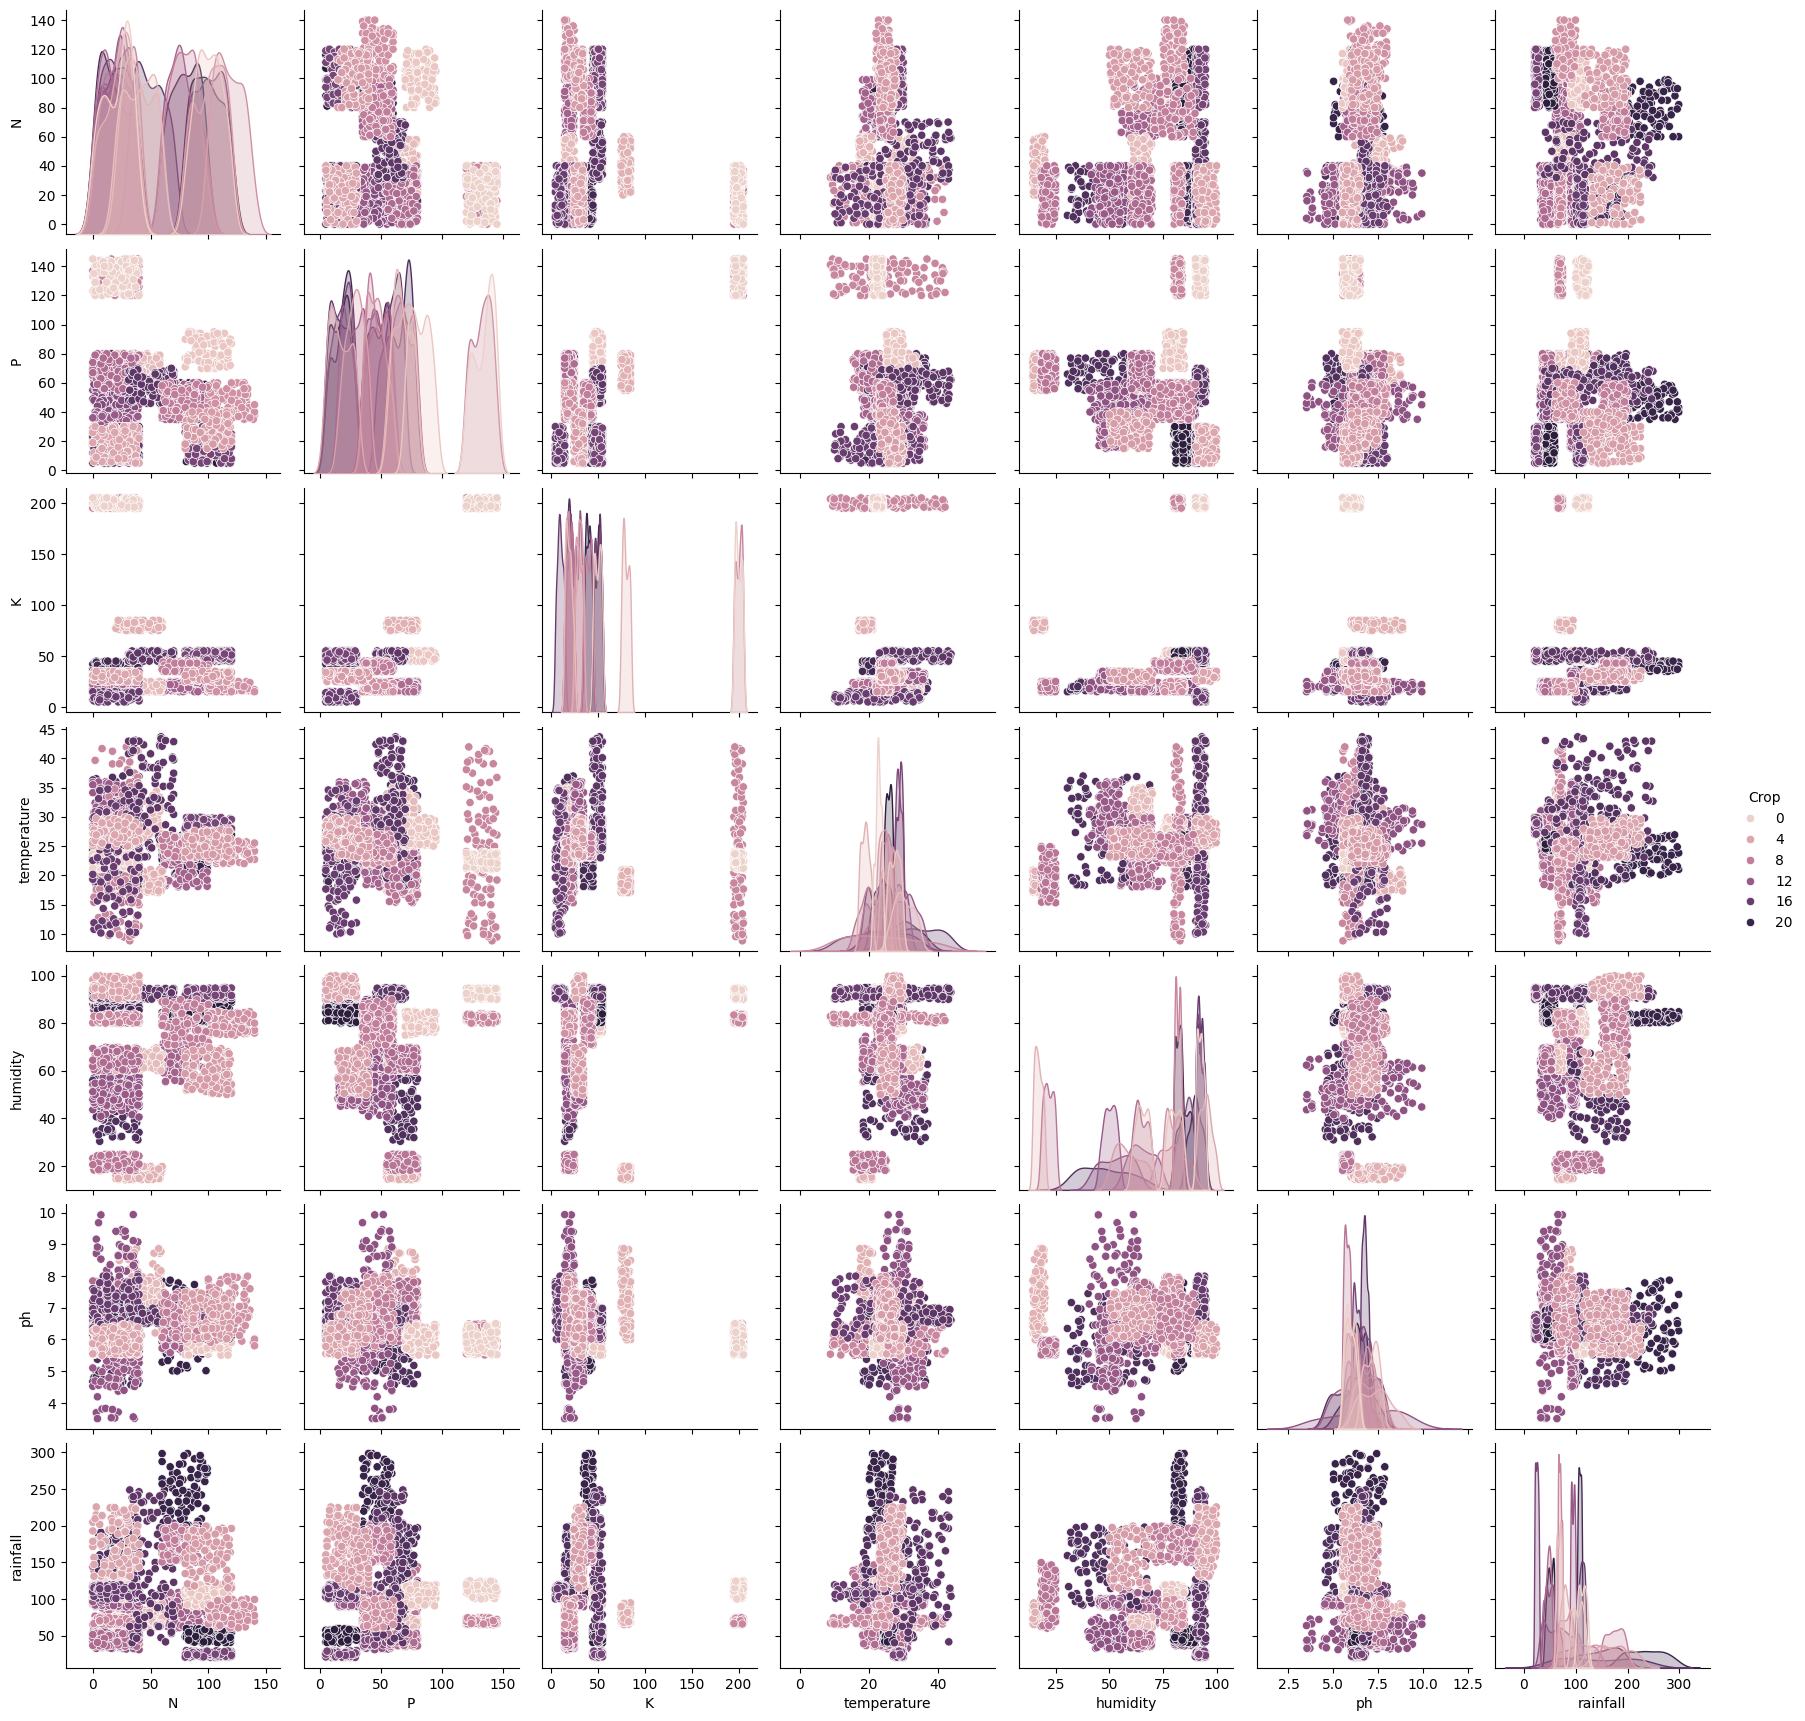

In [145]:
sns.pairplot(df2, hue='Crop') 
plt.show()

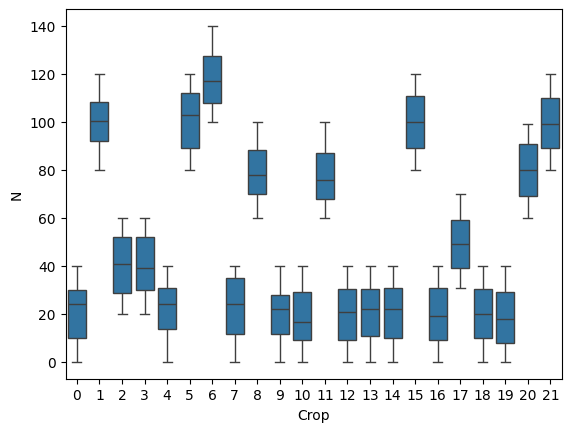

In [146]:
sns.boxplot(x='Crop', y='N', data=df2)
plt.show()


## Model Building

In [147]:
from sklearn.model_selection import train_test_split
x=df2.drop('Crop',axis=1)
y=df2['Crop']
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [148]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

for name, model in models.items():
    model.fit(X_train, Y_train)
    preds = model.predict(X_test)
    print(f"----- {name} -----")
    print("Accuracy:", accuracy_score(y_test, preds))
    print("Classification Report:\n", classification_report(y_test, preds))
    print("\n")

----- Decision Tree -----
Accuracy: 0.9840909090909091
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       0.95      1.00      0.98        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        17
           6       1.00      1.00      1.00        17
           7       1.00      1.00      1.00        14
           8       0.91      0.87      0.89        23
           9       1.00      1.00      1.00        20
          10       0.92      1.00      0.96        11
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        19
          13       1.00      0.92      0.96        24
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        17
  

## Save the model

In [150]:
import pickle

model=XGBClassifier()
model.fit(X_train,Y_train)
with open('crop_model.pkl','wb')as file:
    pickle.dump(model,file)